# 1. Ziffernerkennung mittels Tensorflow

Wir starten damit, eine bekannte Bibliothek im Bereich des maschinellen Lernens zu laden: Tensorflow.

In [109]:
import tensorflow as tf

Als nächstes laden wir uns den MNIST-Datensatz herunter.
Er besteht aus handschriftlichen Ziffern von 0 bis 9 und enthält 60.000 grauwertige Trainingsbilder der Größe 28x28, und zusätzlich 10.000 Testbilder.

In [110]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Schauen wir uns einmal die Daten an:

In [111]:
print('Typ von x_train: {}'.format(type(x_train)))
print('Shape von x_train: {}'.format(x_train.shape))
x_train[0]

Typ von x_train: <class 'numpy.ndarray'>
Shape von x_train: (60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Versuchen wir mal, die Daten etwas schöner darzustellen.

Zahl ist 0


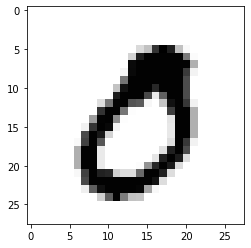

In [112]:
import matplotlib.pyplot as plt
i = 75
plt.imshow(x_train[i], cmap='Greys')
print('Zahl ist {}'.format(y_train[i]))

Unser Ziel ist es einen Algorithmus zu entwickeln der ein Bild der Größe 28 x 28 Pixel als Eingabe bekommt und diesem eine Ziffer von 0 bis 9 zuweist.

**Datenbereich**: $\{ 0, 1, \ldots, 255 \}^{28 \times 28}$

**Wertebereich**: $\{0, 1, \ldots , 9\}$

Mathematisch gesprochen suchen wir eine Funktion, die die Abbildung

$$ 
f : \text{Bild} \mapsto \text{Ziffer}
$$

realisiert, also

$$
f : \{0, 1, \ldots, 255\}^{28 x 28} \to \{0, 1, \ldots , 9\}.
$$

## Training eines Models

Zuerst laden wir einige Funktionen.

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Multiply

In [115]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

In [116]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [117]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [118]:
model.fit(x_train, y_train, batch_size = 128, epochs = 3)

Epoch 1/3
469/469 [==============================] - 3s 5ms/step - loss: 4.5596 - accuracy: 0.8709
Epoch 2/3
469/469 [==============================] - 5s 10ms/step - loss: 0.6948 - accuracy: 0.9165
Epoch 3/3
469/469 [==============================] - 3s 7ms/step - loss: 0.3566 - accuracy: 0.9356


In [82]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.4460 - accuracy: 0.9163


[0.4459875524044037, 0.9162999987602234]

In [123]:
import numpy as np
np.argmax(model.predict(x_test[:1]))
#y_test[:1]

7

Alternativ können wir die Ziffern von 0 bis 9 auch anders kodieren, nämlich als Vektoren der Länge 10, die genau an einer Stelle eine Eins und sonst Nullen enthält, eine 2 würde dem Vektor

$$
\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}
$$

entsprechen.

In [124]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 2. Ein einfaches Neuronals Netz